In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# from folium import Choropleth
# import geopandas as gpd


In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df.head()

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,...,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
0,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,1,...,1,0,4,flat_studio,203,0,1,1,2,residential_sale
1,6,13,1920,Belgium,Tournai,0,NON_FLOOD_ZONE,0,0,2,...,31,1,4,apartment_block,130,0,0,5,1,residential_sale
2,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,1,...,3,0,4,house,0,0,0,2,1,residential_sale
3,1,4,1979,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,1,...,9,1,2,house,170,0,1,2,1,residential_sale
4,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,1,...,1,0,5,apartment,400,0,1,1,2,residential_sale


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.shape

(94891, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94891 entries, 0 to 94890
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bathroomcount      94891 non-null  int64  
 1   bedroomcount       94891 non-null  int64  
 2   constructionyear   94891 non-null  int64  
 3   country            94891 non-null  object 
 4   district           94891 non-null  object 
 5   fireplace          94891 non-null  int64  
 6   floodingzone       94891 non-null  object 
 7   furnished          94891 non-null  int64  
 8   garden             94891 non-null  int64  
 9   kitchen            94891 non-null  int64  
 10  livingarea         94891 non-null  float64
 11  locality           94888 non-null  object 
 12  monthlycharges     94891 non-null  float64
 13  numberoffacades    94891 non-null  int64  
 14  peb                94891 non-null  object 
 15  postalcode         94891 non-null  int64  
 16  price              948

# **CHARTS**

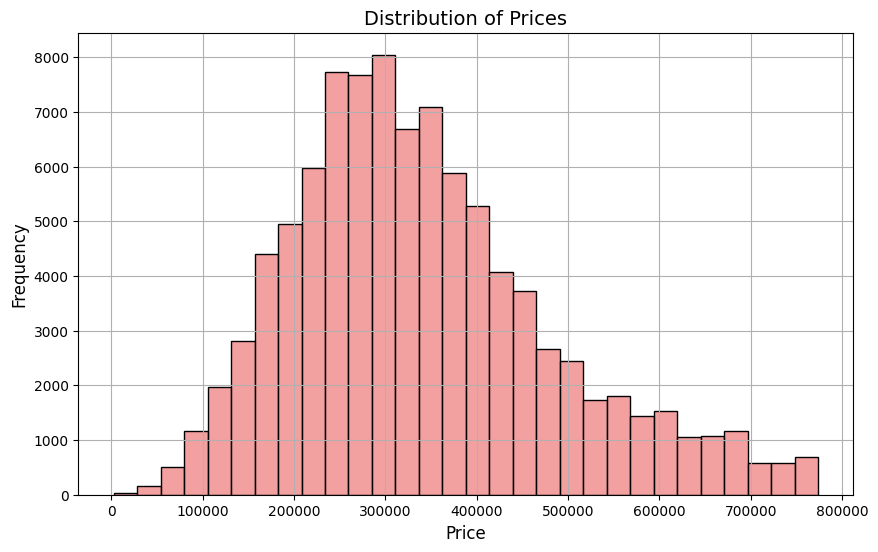

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df.price, bins=30, color='lightcoral', kde=False)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prices', fontsize=14)
plt.grid(True)  
plt.show()

In [7]:
df.dtypes

bathroomcount          int64
bedroomcount           int64
constructionyear       int64
country               object
district              object
fireplace              int64
floodingzone          object
furnished              int64
garden                 int64
kitchen                int64
livingarea           float64
locality              object
monthlycharges       float64
numberoffacades        int64
peb                   object
postalcode             int64
price                  int64
propertyid             int64
province              object
region                object
roomcount              int64
showercount            int64
stateofbuilding        int64
subtypeofproperty     object
surfaceofplot          int64
swimmingpool           int64
terrace                int64
toiletcount            int64
typeofproperty         int64
typeofsale            object
dtype: object

# **Numeric Feature**

Text(0.5, 1.0, 'Numeric Feature Heatmap')

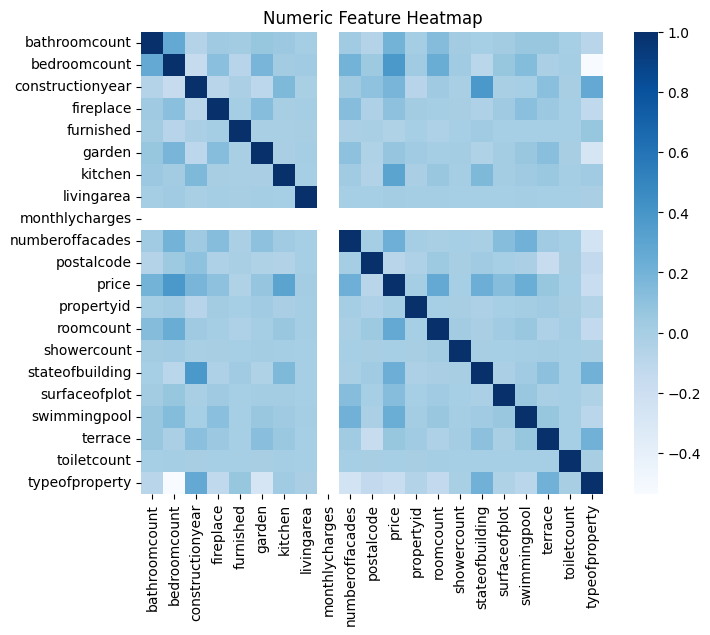

In [8]:
fig, ax = plt.subplots(figsize = (8, 6))
correlation = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()
sns.heatmap(correlation, ax = ax, vmax = 1, square = True, cmap='Blues')
plt.title('Numeric Feature Heatmap')

### **Delete Outliers in Living Area and Bedrooom Count**

In [9]:
display(df.shape)
Q1 = df['livingarea'].quantile(0.1)
Q3 = df['livingarea'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# print(lower_bound, upper_bound)
df = df[(df['livingarea'] > lower_bound) & (df['livingarea'] < upper_bound)]
# display(df.shape)


(94891, 30)

In [10]:
display(df.shape)
Q1 = df['bedroomcount'].quantile(0.1)
Q3 = df['bedroomcount'].quantile(0.9)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
df = df[(df['bedroomcount'] > lower_bound) & (df['bedroomcount'] < upper_bound)]
# display(df.shape)


(94161, 30)

-3.5 8.5


# **Correlation**

In [11]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()


correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation


,price
price,1.000000
livingarea,0.507007
bedroomcount,0.388258
kitchen,0.304146
roomcount,0.267926
stateofbuilding,0.235557
swimmingpool,0.233980
numberoffacades,0.223656
bathroomcount,0.191232
constructionyear,0.191061


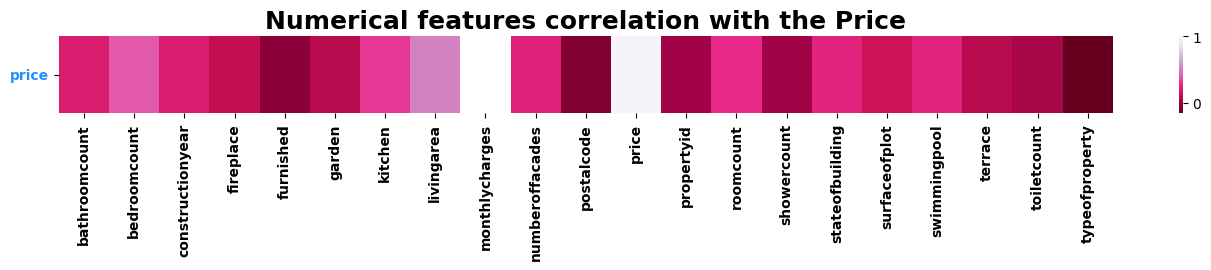

In [12]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))


sns.heatmap(corr_num.sort_values(by = ['price'], ascending = False).head(1), cmap = 'PuRd_r');
plt.title("Numerical features correlation with the Price", weight = 'bold', fontsize = 18)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold', color = 'dodgerblue', rotation = 0)

plt.show()

# **LIVING AREA Distribution**


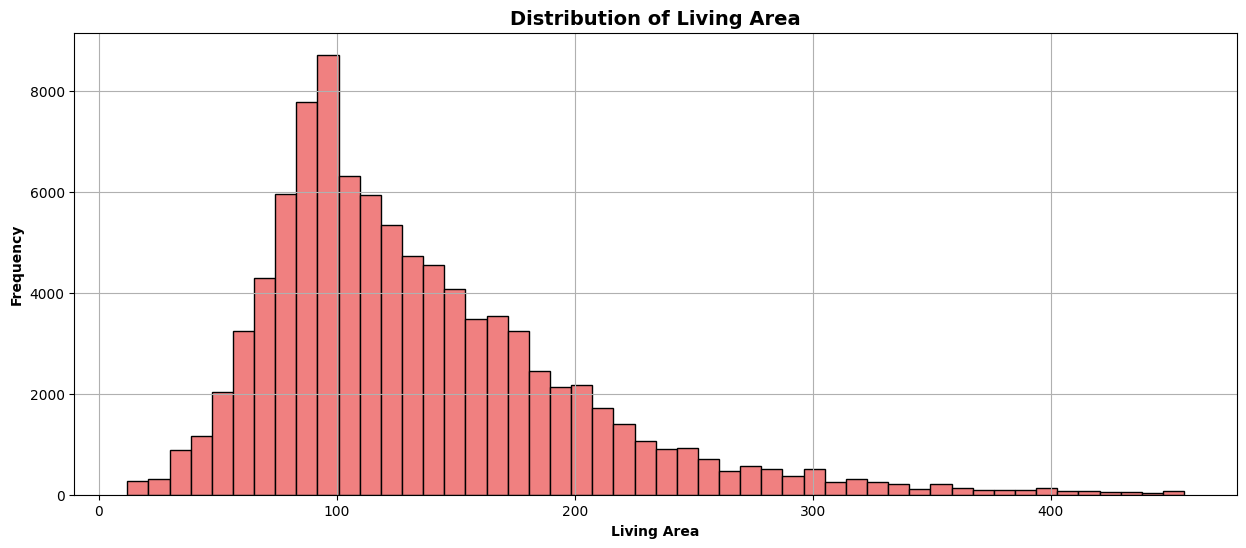

In [13]:
plt.figure(figsize=(15, 6))
plt.hist(df['livingarea'], bins=50, color='lightcoral', edgecolor='black')
plt.title("Distribution of Living Area", weight='bold', fontsize=14)
plt.xlabel("Living Area", weight='bold')
plt.ylabel("Frequency", weight='bold')
plt.grid(True)
plt.show()

# **PROVINCES vs AVG PRICES** 

In [14]:
avg_price_province = df.groupby('province')['price'].mean().reset_index()
avg_price_province.head()

,province,price
0,Antwerp,360844.235067
1,Brussels,372776.499594
2,East Flanders,353205.783915
3,Flemish Brabant,401070.404547
4,Hainaut,241266.029198


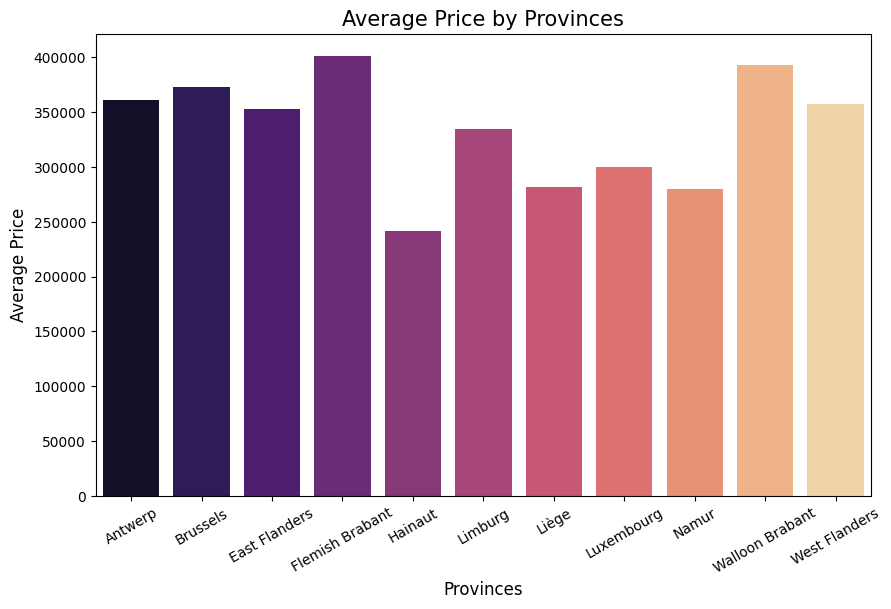

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data = avg_price_province, y ="price", x ="province", hue = 'province', palette='magma')
plt.xticks(rotation=30)
plt.xlabel('Provinces',  fontsize = 12)
plt.ylabel('Average Price',  fontsize = 12)
plt.title('Average Price by Provinces',  fontsize = 15)
plt.show()

# **DECADES vs AVG PRICES** 

In [16]:
def year_to_decade(year):
    return (year // 10) * 10

df['decade'] = df['constructionyear'].apply(year_to_decade)

In [17]:
decades = df.groupby('decade')['price'].mean().reset_index()

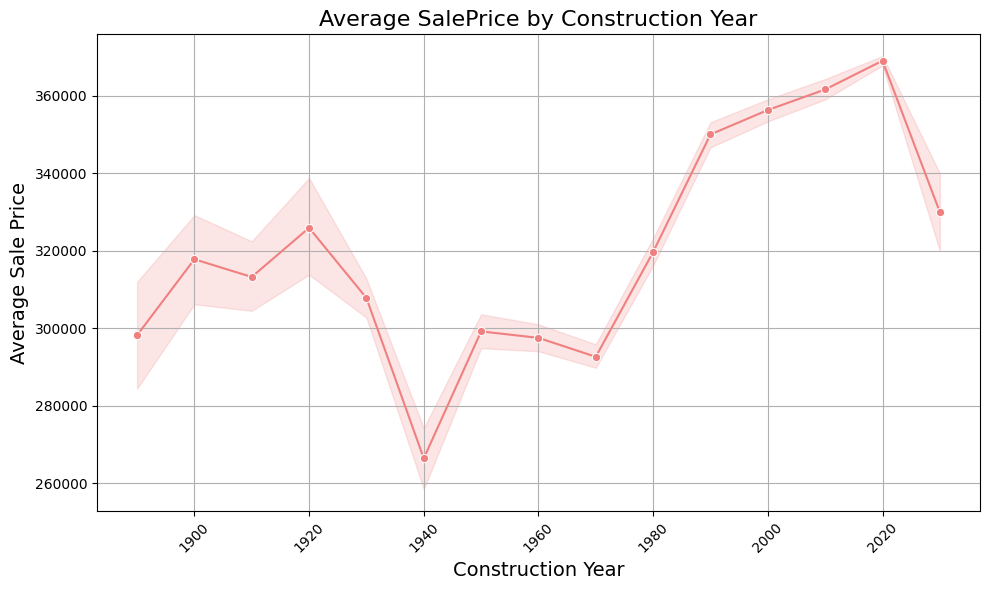

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='decade', y='price', marker='o', color='lightcoral')

plt.title('Average SalePrice by Construction Year', fontsize=16)
plt.xlabel('Construction Year', fontsize=14)
plt.ylabel('Average Sale Price', fontsize=14)
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  

plt.show()

# **Bedroom Count VS Price**

In [19]:
bedr_mean = df.groupby('bedroomcount')['price'].mean().reset_index()


<Axes: xlabel='bedroomcount', ylabel='price'>

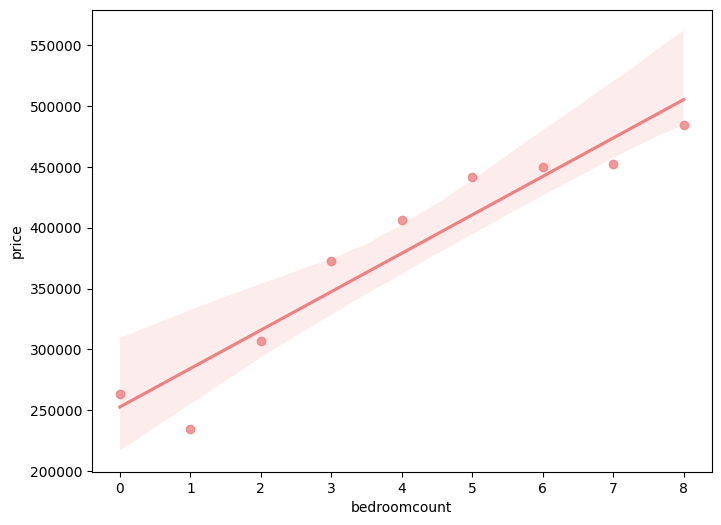

In [20]:


fig,ax = plt.subplots(figsize=(8,6))
sns.regplot(x = 'bedroomcount', y='price' , data=bedr_mean, ax=ax, color = 'lightcoral')

## **price per square meter**

In [21]:

df['per_square'] = df['price'] / df['livingarea']

In [22]:
dist_per_meter = df.groupby('district')['per_square'].mean().reset_index()
dist_per_meter.head()

,district,per_square
0,Aalst,2470.530878
1,Antwerp,3056.569392
2,Arlon,2749.475588
3,Ath,2027.561559
4,Bastogne,2437.259420


In [23]:
province_per_meter = df.groupby('province')['per_square'].mean().reset_index()
province_per_meter.head()

,province,per_square
0,Antwerp,2912.070816
1,Brussels,3685.016872
2,East Flanders,2546.398355
3,Flemish Brabant,3241.615915
4,Hainaut,1888.155635


In [24]:
region_per_meter = df.groupby('region')['per_square'].mean().reset_index()
region_per_meter.head()

,region,per_square
0,Brussels,3685.016872
1,Flanders,2985.930235
2,Wallonie,2250.862194


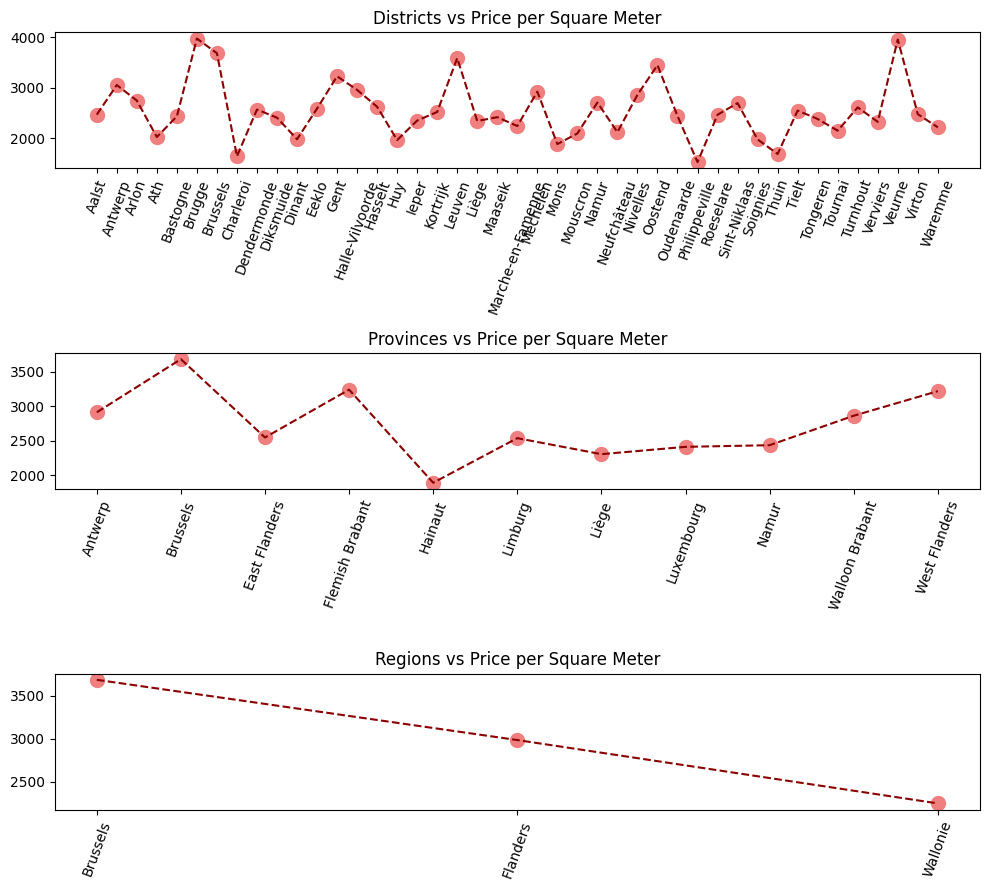

In [25]:
fig, ax = plt.subplots(3, 1, figsize = (10, 9))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

ax[0].scatter(dist_per_meter['district'], dist_per_meter['per_square'], color = 'lightcoral', s = 100)
ax[0].plot(dist_per_meter['district'], dist_per_meter['per_square'], linestyle='--', color='darkred')
ax[0].set_title('Districts vs Price per Square Meter')
ax[0].set_xticks(np.arange(len(dist_per_meter['district']))) 
ax[0].set_xticklabels(dist_per_meter['district'], rotation = 70, fontsize = 10)

ax[1].scatter(province_per_meter['province'], province_per_meter['per_square'], color = 'lightcoral', s = 100)
ax[1].plot(province_per_meter['province'], province_per_meter['per_square'], linestyle='--', color='darkred')
ax[1].set_title('Provinces vs Price per Square Meter')
ax[1].set_xticks(np.arange(len(province_per_meter['province']))) 
ax[1].set_xticklabels(province_per_meter['province'], rotation = 70, fontsize = 10)


ax[2].scatter(region_per_meter['region'], region_per_meter['per_square'], color = 'lightcoral', s = 100)
ax[2].plot(region_per_meter['region'], region_per_meter['per_square'], linestyle='--', color='darkred')
ax[2].set_title('Regions vs Price per Square Meter')
ax[2].set_xticks(np.arange(len(region_per_meter['region'])))
ax[2].set_xticklabels(region_per_meter['region'], rotation = 70, fontsize = 10)


plt.tight_layout()



In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(x='livingarea', y='price', data=liv_area, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.title('Relationship between Living Area and Price', fontsize=16)
plt.xlabel('Living Area', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'liv_area' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
state = df.groupby('stateofbuilding')['price'].mean().reset_index()
state.head()

,stateofbuilding,price
0,0,229356.196931
1,1,262249.250790
2,2,270405.915407
3,3,303873.294458
4,4,350857.867187


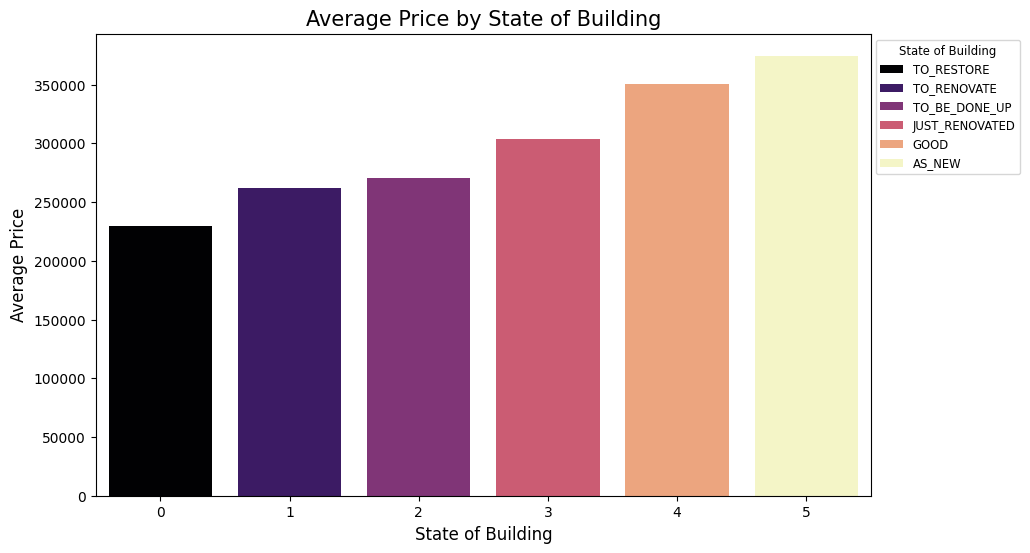

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data = state, y="price", x="stateofbuilding",hue = 'stateofbuilding', palette='magma');
plt.legend(loc='upper right', title='State of Building', fontsize='small', title_fontsize='small')
# plt.xticks(rotation=30)
plt.xlabel('State of Building',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Average Price by State of Building',  fontsize = 15)


legend_labels = ['TO_RESTORE', 'TO_RENOVATE', 'TO_BE_DONE_UP', 'JUST_RENOVATED', 'GOOD', 'AS_NEW']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='State of Building', fontsize='small', title_fontsize='small')



plt.show()

In [ ]:
df.region.value_counts()

region
Flanders    57046
Wallonie    28343
Brussels     8615
Name: count, dtype: int64

Text(0.5, 1.0, 'Region vs Price')

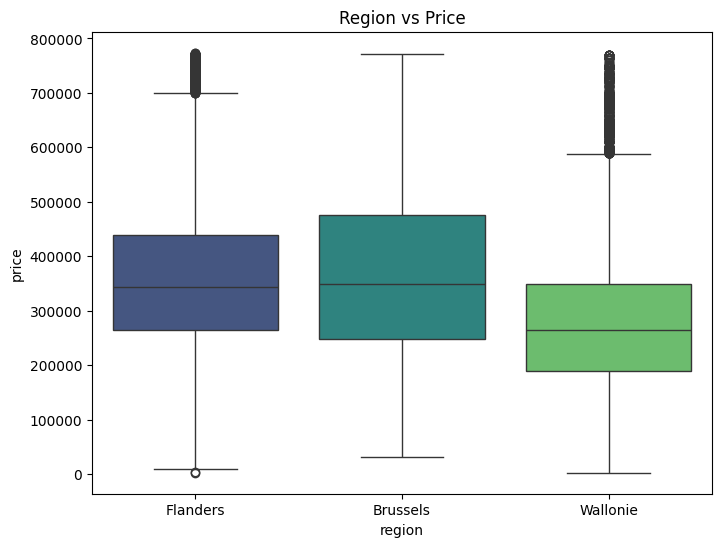

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'region', y = 'price',hue = 'region', data = df, ax=ax, palette='viridis')
plt.title('Region vs Price')

In [ ]:
df.typeofproperty.value_counts()

typeofproperty
1    47353
2    46651
Name: count, dtype: int64

In [ ]:
type_home = df.groupby('typeofproperty')['price'].mean().reset_index()
display(type_home)
property_mapping = { 1: 'HOUSE', 2: 'APARTMENT'}
type_home['typeofproperty'] = type_home['typeofproperty'].map(property_mapping)
display(type_home)                                        

,typeofproperty,price
0,1,361887.694507
1,2,315281.749630


,typeofproperty,price
0,HOUSE,361887.694507
1,APARTMENT,315281.749630


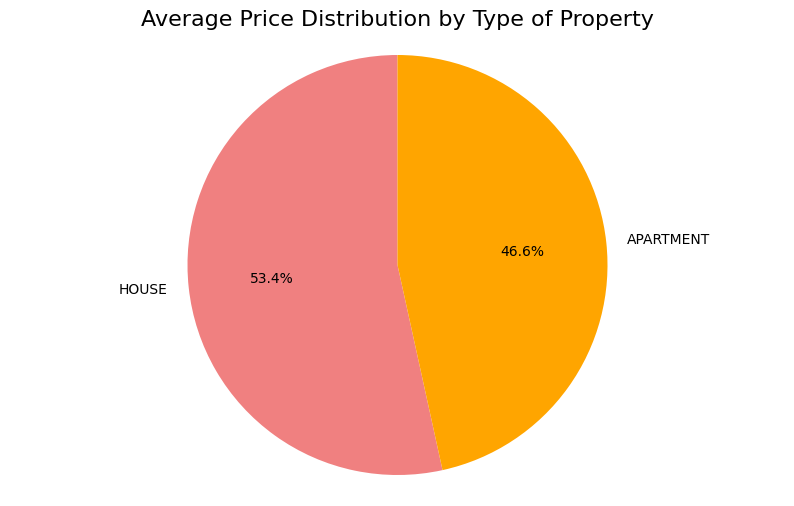

In [ ]:
plt.figure(figsize = (10, 6))
plt.pie(type_home['price'], labels = type_home['typeofproperty'], autopct = '%1.1f%%', startangle = 90, colors = ['lightcoral', 'orange', ]);
plt.title('Average Price Distribution by Type of Property', fontsize=16)
plt.axis('equal')
plt.show()

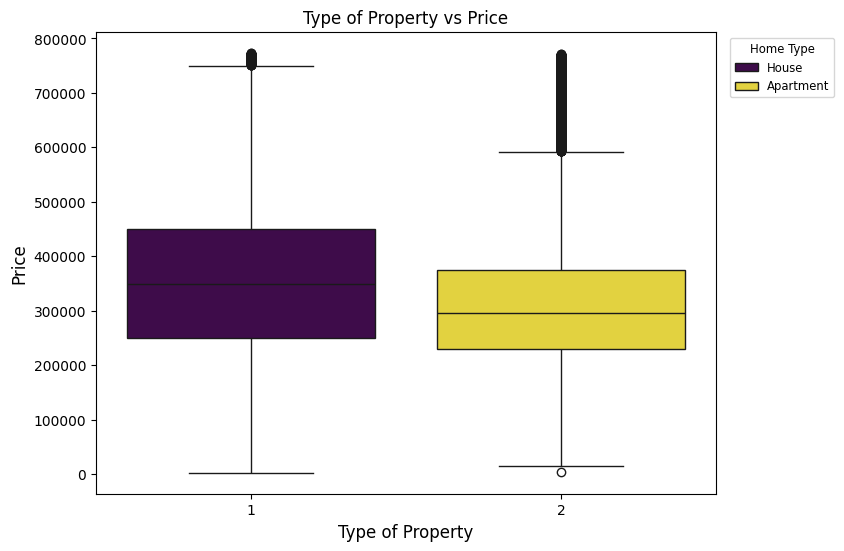

In [ ]:
fig,ax = plt.subplots(figsize=(8,6))
sns.boxplot(x = 'typeofproperty', y = 'price',hue = 'typeofproperty', data = df, ax=ax, palette='viridis')
plt.title('Type of Property vs Price')
plt.xlabel('Type of Property',  fontsize = 12)
plt.ylabel('Price',  fontsize = 12)

legend_labels = ['House','Apartment']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='Home Type', fontsize='small', title_fontsize='small')

plt.show()

In [ ]:
kitchen_stats = df.groupby('kitchen')['price'].mean().reset_index()
kitchen_stats.head()

,kitchen,price
0,0,268968.739384
1,1,309969.822629
2,2,341323.731028
3,3,423868.880320


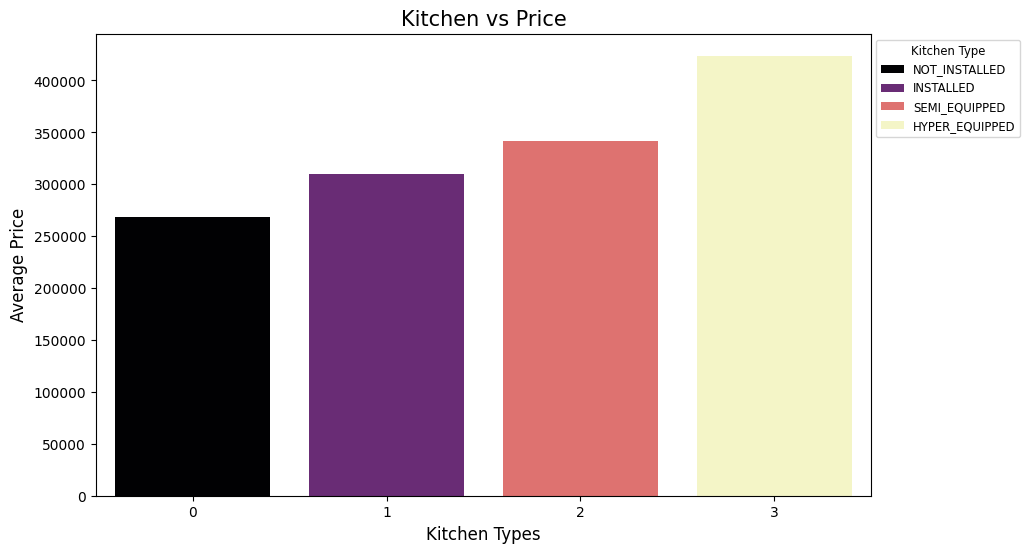

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data = kitchen_stats, y="price", x="kitchen",hue = 'kitchen', palette='magma');
plt.xlabel('Kitchen Types',  fontsize = 12)
plt.ylabel('Average Price', fontsize = 12)
plt.title('Kitchen vs Price',  fontsize = 15)



legend_labels = ['NOT_INSTALLED','INSTALLED','SEMI_EQUIPPED','HYPER_EQUIPPED']
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels=legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1), title='Kitchen Type', fontsize='small', title_fontsize='small')


plt.show()

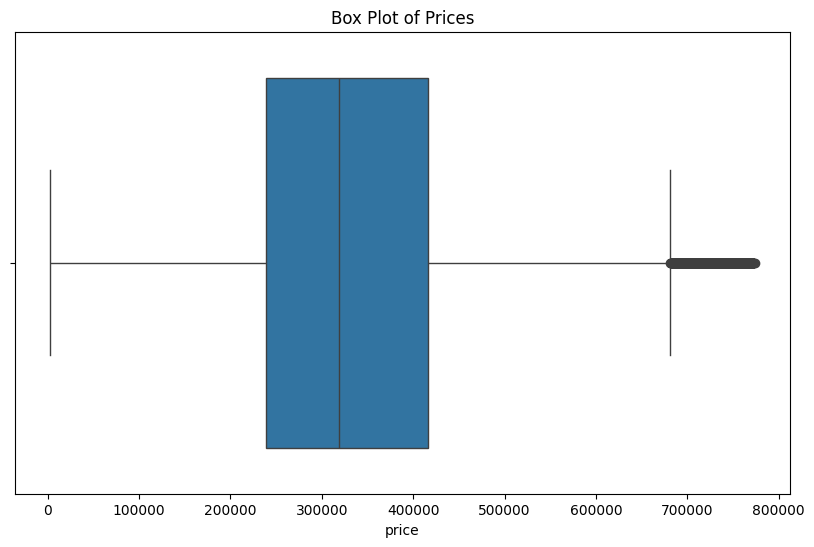

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Prices')
plt.show()

In [ ]:

correlation = corr_num['price'].sort_values(ascending = False).to_frame()

correlation

,price
price,1.000000
livingarea,0.507007
bedroomcount,0.388258
kitchen,0.304146
roomcount,0.267926
stateofbuilding,0.235557
swimmingpool,0.233980
numberoffacades,0.223656
bathroomcount,0.191232
constructionyear,0.191061


In [ ]:
bedroom = df.groupby('bedroomcount')['price'].mean().reset_index()

bedroom.head()

,bedroomcount,price
0,0,262880.055534
1,1,234326.820557
2,2,306543.167937
3,3,372871.315045
4,4,406077.445622


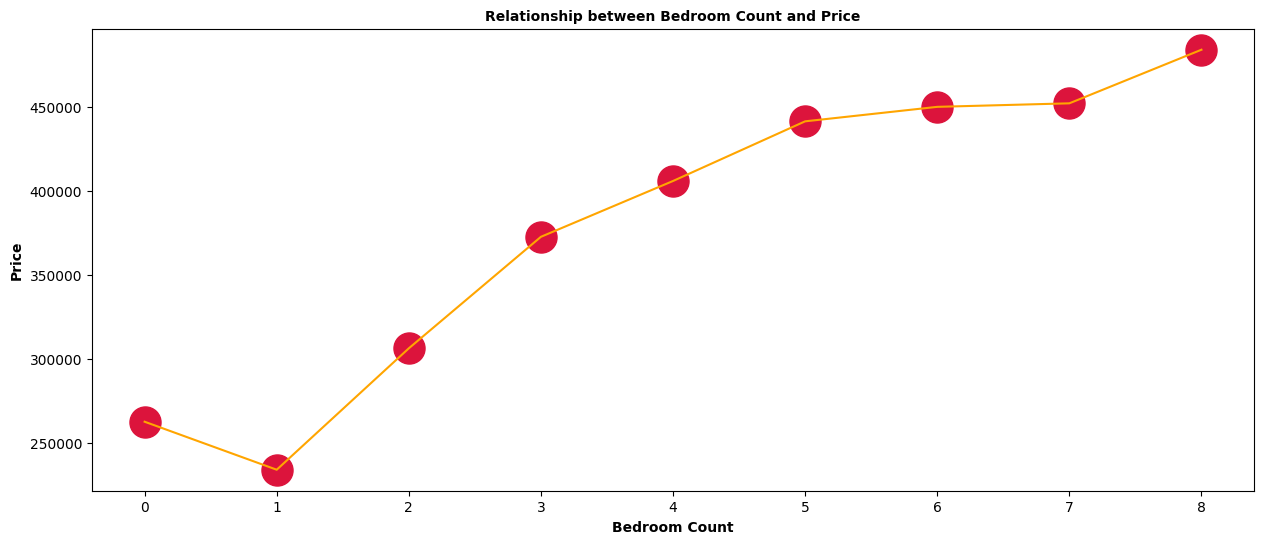

In [ ]:
plt.figure(figsize=(15, 6))
plt.scatter(data=bedroom, x='bedroomcount', y='price', color='crimson', alpha=1, s=500)
plt.plot(bedroom['bedroomcount'], bedroom['price'], color = 'orange')  
plt.title("Relationship between Bedroom Count and Price", weight='bold', fontsize=10)
plt.xlabel("Bedroom Count", weight='bold')
plt.ylabel("Price", weight='bold')
plt.show()

In [ ]:
# upload the house data


# calculate the number of houses per postal code
post_code_counts = df['postalcode'].value_counts()
house_count = df['propertyid'].value_counts()

# convert the series to a DataFrame
summary_df = post_code_counts.reset_index()
summary_df.columns = ['Postal Code', 'House Count']

# save the summary to a csv file
summary_df.to_csv('post_code_summary.csv', index=False)
# load geojson 
gdf = gpd.read_file('georef-belgium-postal-codes.geojson')

# load summary data
summary_df = pd.read_csv('post_code_summary.csv')

# arrange data types
gdf['postcode'] = gdf['postcode'].astype(str)
summary_df['Postal Code'] = summary_df['Postal Code'].astype(str)

# merge data
gdf = gdf.merge(summary_df, left_on='postcode', right_on='Postal Code', how='left')

# empty house counts are filled with 0
gdf['House Count'].fillna(0, inplace=True)
gdf['House Count'] = gdf['House Count'].astype(int)

# create a folium map
map = folium.Map(location=[50.85, 4.35], zoom_start=7)  # Belgium coordinates

# create a folium choropleth map
folium.Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['postcode', 'House Count'],
    key_on='feature.properties.postcode',  # GeoJSON property path to the postcode
    fill_color='YlOrBr',  # color scale
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='House Count'
).add_to(map)

# save the map
map.save('map_chart.html')




In [27]:
df.head()

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale,decade,per_square
0,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,0,1,29.0,Zeebrugge,0.0,2,B,8380,99000,10957010,West Flanders,Flanders,1,0,4,flat_studio,203,0,1,1,2,residential_sale,1960,3413.793103
2,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,0,1,111.0,BLANKENBERGE,0.0,2,B,8370,399000,10956807,West Flanders,Flanders,3,0,4,house,0,0,0,2,1,residential_sale,2000,3594.594595
3,1,4,1979,Belgium,Veurne,0,NON_FLOOD_ZONE,0,1,1,113.6,De Panne,0.0,2,F,8660,230000,10956664,West Flanders,Flanders,9,1,2,house,170,0,1,2,1,residential_sale,1970,2024.647887
4,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,0,1,92.0,Hasselt,0.0,2,B,3500,198000,10956668,Limburg,Flanders,1,0,5,apartment,400,0,1,1,2,residential_sale,1970,2152.173913
5,1,1,1994,Belgium,Brussels,0,NON_FLOOD_ZONE,1,0,3,50.0,Schaerbeek,0.0,2,E,1030,215000,10956614,Brussels,Brussels,3,1,5,apartment,143,0,1,1,2,residential_sale,1990,4300.000000


In [30]:
print(len(df[df['district'] == 'Brugge']))

3887


In [29]:
df[['district', 'price']].head()

,district,price
0,Brugge,99000
2,Brugge,399000
3,Veurne,230000
4,Hasselt,198000
5,Brussels,215000


In [35]:
df.groupby('region')['bedroomcount'].mean().reset_index()

,region,bedroomcount
0,Brussels,2.151132
1,Flanders,2.582828
2,Wallonie,2.741665
